In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = pd.read_csv('./data/mnist_sample.csv')

In [5]:
mnist = mnist[(mnist['label'] == 0) | (mnist['label'] == 1)]
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y = mnist['label'].values
y

array([1, 0, 1, ..., 1, 0, 1])

In [30]:
X = mnist.drop(columns=['label']).values
X = X / X.max()

In [31]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (8816, 784)
Shape of y: (8816,)


In [32]:
train_size = int(len(y) * 0.6)

X_train = X[:train_size, :]
X_test = X[train_size:, :]

y_train, y_test = y[:train_size], y[train_size:]

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (5289, 784)
Shape of y_train: (5289,)
Shape of X_test: (3527, 784)
Shape of y_test: (3527,)


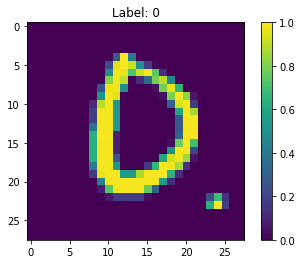

In [34]:
def show_image(index):
    image = X[index, :].reshape((28, 28))
    label = y[index]
    
    plt.imshow(image)
    plt.title("Label: {:d}".format(label))
    plt.colorbar()
    plt.show()

show_image(150)

In [39]:
def gradient_descent(grad, lr, start_point, err=0.001, max_iter=1000):
    
    it = 1
    diff = np.inf
    
    x_old = np.array(start_point)
    
    while (it < max_iter) and (diff > err):
        
        x_new = x_old - lr * grad(x_old)
        
        diff = np.sum(abs(x_old - x_new))
        it += 1
        (x_old, x_new) = (x_new, x_old)
    
    return x_old

In [40]:
# y = x^2 - 2x + 1
def gder(x):
    return 2*x - 2

gradient_descent(grad=gder, lr=0.01, start_point=3)

1.0485990660244802

In [43]:
def logistic(weights, X):
    z = np.matmul(X, weights)
    return 1 / (1 + np.exp(-z))

In [48]:
def loss(weights, X, y):
    h = logistic(weights, X)
    return (-1 / len(y)) * np.sum(y * np.log(h) + (1 - y)*np.log(1 - h))

def loss_grad(weights, X, y):
    h = logistic(weights, X)
    return (1 / len(y)) * np.matmul((h - y), X)

In [50]:
# lgrad = lambda w: loss_grad(weight=w, X=X_train, y=y_train)

def lgrad(w):
    return loss_grad(weights=w, X=X_train, y=y_train)

w_opt = gradient_descent(grad=lgrad, lr=0.01,
                         start_point=np.zeros(shape=X.shape[1]),
                         err=0.001, max_iter=1000)

In [68]:
def predict(X):
    return (logistic(w_opt, X) > 0.5).astype(int)

In [69]:
y_pred = predict(X_test)

In [71]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).astype(int).mean()

In [73]:
acc_train = accuracy(predict(X_train), y_train)
acc_test = accuracy(predict(X_test), y_test)

print('Train acc:', acc_train)
print('Test acc:', acc_test)

Train acc: 0.9977311401020987
Test acc: 0.9980153104621491


In [85]:
def gradient_descent(grad, lr, start_point, err=0.001, max_iter=1000):
    
    it = 1
    diff = np.inf
    
    x_old = np.array(start_point)
    
    while (it < max_iter) and (diff > err):
        
        x_new = x_old - lr * grad(x_old)
        
        diff = np.sum(abs(x_old - x_new))
        it += 1
        (x_old, x_new) = (x_new, x_old)
    
    return x_old

class LogisticRegression:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.weights = None
    
    def _logistic(self, w, X):
        z = np.matmul(X, w)
        return 1 / (1 + np.exp(-z))

    def _loss(self, X, y):
        h = self._logistic(X)
        return (-1 / len(y)) * np.sum(y * np.log(h) + (1 - y)*np.log(1 - h))

    def _loss_grad(self, w, X, y):
        h = self._logistic(w, X)
        return (1 / len(y)) * np.matmul((h - y), X)
    
    def fit(self, X, y, w0=None):
        
        if w0 is None:
            if self.weights is None:
                w0 = np.zeros(shape=X.shape[1])
            else:
                w0 = self.weights

        lgrad = lambda w: self._loss_grad(w=w, X=X, y=y)
        w_opt = gradient_descent(grad=lgrad, lr=0.01,
                                 start_point=w0,
                                 err=0.001, max_iter=1000)
        self.weights = w_opt
    
    def predict(self, X):

        if self.weights is None:
            raise Warning('First train your model.')

        return (logistic(self.weights, X) > 0.5).astype(int)

In [86]:
lr = LogisticRegression()

In [87]:
lr.fit(X_train, y_train)

In [88]:
acc_train = accuracy(lr.predict(X_train), y_train)
acc_test = accuracy(lr.predict(X_test), y_test)

print('Train acc:', acc_train)
print('Test acc:', acc_test)

Train acc: 0.9977311401020987
Test acc: 0.9980153104621491
